In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def showit(Title="",image=None,size=10):
  w,h=image.shape[0],image.shape[1]
  aspect_ratio=w/h
  plt.figure(figsize=(size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(Title)
  plt.show()

In [ ]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-04-14 21:29:45--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.143.106
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.143.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  17.2MB/s    in 1.6s    

2023-04-14 21:29:47 (17.2 MB/s) - ‘images.zip’ saved [29586716/29586716]



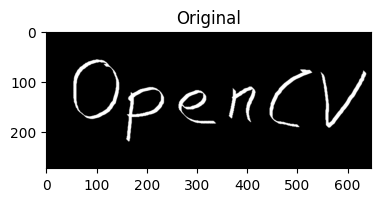

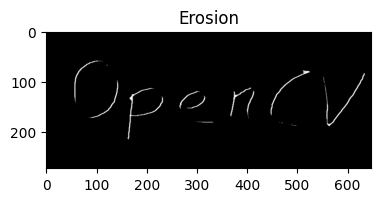

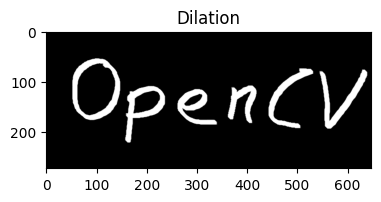

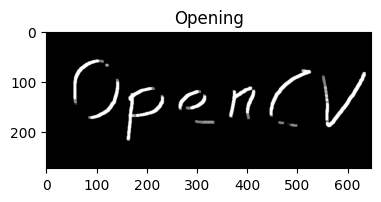

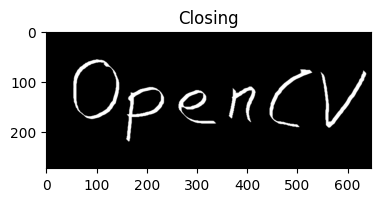

In [ ]:
image = cv2.imread('images/opencv_inv.png', 0)
showit('Original', image)
kernel=np.ones((5,5),np.uint8)
erosion=cv2.erode(image,kernel,iterations=1)
dilation=cv2.dilate(image,kernel,iterations=1)
opening=cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel)
Closing=cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)
showit("Erosion",erosion)
showit("Dilation",dilation)
showit("Opening",opening)
showit("Closing",Closing)

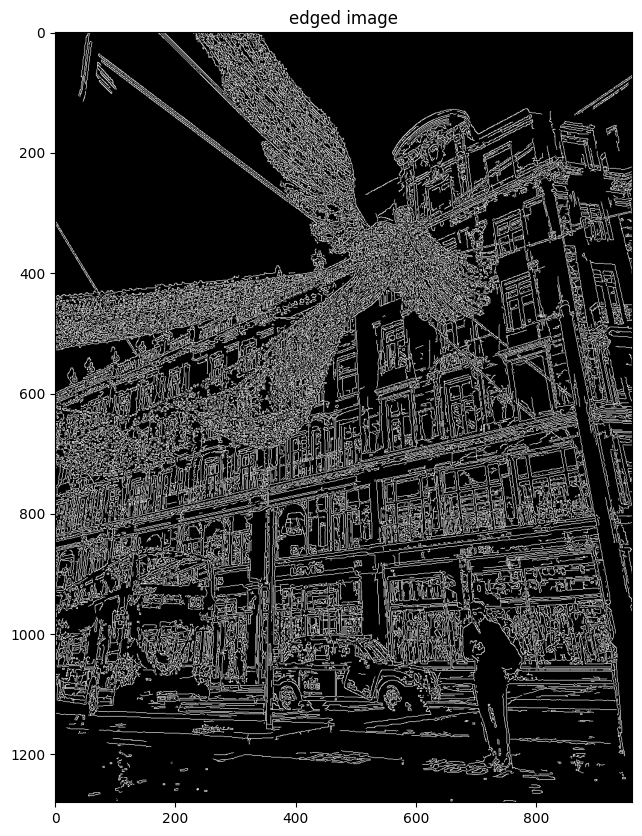

In [ ]:
image = cv2.imread('images/londonxmas.jpeg',0)
#Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge. 
edge1=cv2.Canny(image,50,100)
showit("edged image",edge1)

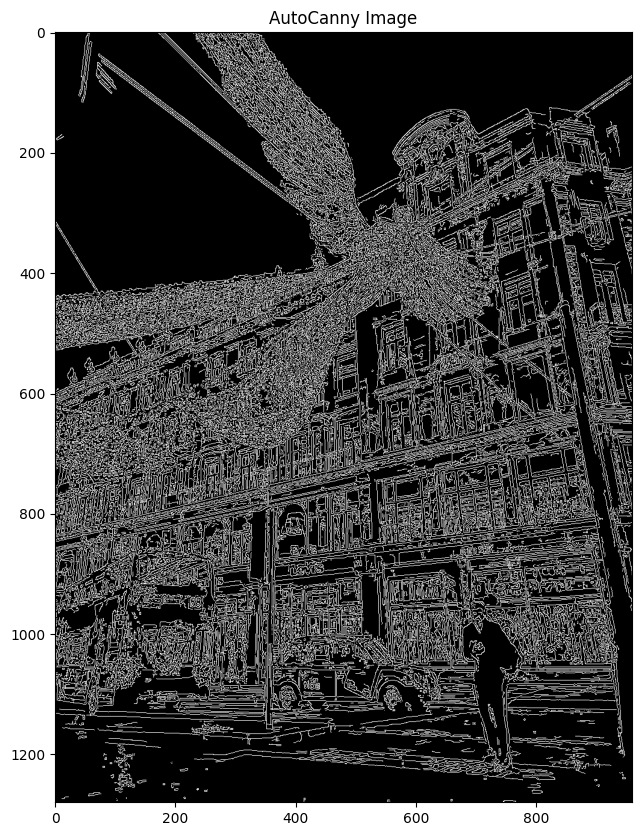

In [10]:
def autocanny(image):
  kernel=np.ones((7,7),np.float32)/49
  blur=cv2.filter2D(image,-1,kernel)
  median=np.median(image)
  low=int(max(0,0.66*median))
  high=int(min(255,1.33*median))
  edges=cv2.Canny(image=image,threshold1=low,threshold2=high)
  return edges

auto_canny=autocanny(image)
showit("AutoCanny Image",auto_canny)